# Semester 1 Project Submission



## Elliot

In [4]:
# Your code here - remember to use markdown cells for comments as well!

## Ian

In [5]:
# Your code here - remember to use markdown cells for comments as well!

## Frida

In [6]:
# Importing
import pandas as pd

In [7]:
# Reading the "Movie info" file
movie_info_df = pd.read_csv('databases/rt.movie_info.tsv', sep='\t', encoding = 'utf-8', index_col=0)
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Data Cleaning

In [8]:
# Data frame overview. Column information, name-data type.
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [9]:
# Column information, name-data type.
movie_info_df.describe()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"32,000,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


In [10]:
# Missing values
movie_info_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [11]:
# Removing duplicate records
movie_info_df = movie_info_df.drop_duplicates()

In [12]:
# Changing NaN values for String "Not Available"
movie_info_df['synopsis'] = movie_info_df['synopsis'].fillna('Not Available')
movie_info_df['rating'] = movie_info_df['rating'].fillna('Not Available')
movie_info_df['genre'] = movie_info_df['genre'].fillna('Not Available')
movie_info_df['director'] = movie_info_df['director'].fillna('Not Available')
movie_info_df['theater_date'] = movie_info_df['theater_date'].fillna('Not Available')
movie_info_df['dvd_date'] = movie_info_df['dvd_date'].fillna('Not Available')
movie_info_df['runtime'] = movie_info_df['runtime'].fillna('Not Available')
movie_info_df['studio'] = movie_info_df['studio'].fillna('Not Available')
movie_info_df['writer'] = movie_info_df['writer'].fillna('Not Available')

In [13]:
# Changing NaN values for 0 in Box Office column
movie_info_df['box_office'] = movie_info_df['box_office'].fillna(0)

# Remmoving commas from Box Office values
movie_info_df['box_office'] = movie_info_df['box_office'].replace({',':''}, regex=True)

# Converting Box Office values into Integers
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

In [14]:
# Checking possible Currency values
currency_values = set(movie_info_df.loc[:,"currency"])
currency_values

# Changing NaN values for "$" in Currency column
movie_info_df['currency'] = movie_info_df['currency'].fillna('$')

# Confirming that there in no more NaN values 
movie_info_df.isna().sum()

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [15]:
# Movies with highest earnings
box_o = movie_info_df.sort_values('box_office')
box_o.head(5)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,0.0,104 minutes,Not Available
1271,"In 2003, respected filmmaker and screenwriter ...",R,Horror,Paul Schrader,Not Available,"May 20, 2005","Oct 25, 2005",$,0.0,111 minutes,Not Available
1270,Not Available,NR,Art House and International|Drama,Xie Jin,Yanzhou Lu,Not Available,Not Available,$,0.0,120 minutes,Not Available
1267,Not Available,NR,Action and Adventure|Kids and Family|Science F...,Guy Ritchie,John August|Guy Ritchie,Not Available,Not Available,$,0.0,Not Available,Not Available
1266,"Slow-moving and dark, this Klute clone stars T...",R,Drama|Mystery and Suspense,Gordon Willis,Not Available,Not Available,Not Available,$,0.0,96 minutes,Not Available


In [16]:
#type(movie_info_df.loc[1,"theater_date"])
m = movie_info_df["theater_date"].str.split()
m

id
1        [Oct, 9,, 1971]
3       [Aug, 17,, 2012]
5       [Sep, 13,, 1996]
6        [Dec, 9,, 1994]
7       [Not, Available]
              ...       
1996    [Aug, 18,, 2006]
1997    [Jul, 23,, 1993]
1998     [Jan, 1,, 1962]
1999     [Apr, 1,, 1993]
2000    [Sep, 27,, 2001]
Name: theater_date, Length: 1556, dtype: object

## Enrique

In [17]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [18]:
#read tn file
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', encoding = 'utf-8', index_col = 0)

#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])

#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')

#remove
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)

#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)

#create metric ratios
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']

tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db

,release_date,title,production_budget,domestic_gross,worldwide_gross,ww_gross / budget,dom_gross / budget
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,6.532577,1.789430
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,2.546673,0.587101
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,0.427892,0.122178
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,4.243841,1.388403
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,4.153696,1.956408
...,...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0.000000e+00,0.000000,0.000000
79,1999-04-02,Following,6000,48482,2.404950e+05,40.082500,8.080333
80,2005-07-13,Return to the Land of Wonders,5000,1338,1.338000e+03,0.267600,0.267600


In [19]:
# import all necessary packages
import csv
import pandas as pd
import numpy as np

# Opening + Reading the Movie_Gross CSV file
tmdb_movie_gross = pd.read_csv('DataBases/bom.movie_gross.csv', encoding = 'utf-8')

# Remove duplicate records
tmdb_movie_gross = tmdb_movie_gross.drop_duplicates()

# Replace NaN / null values to a "0" because we're reviewing gross/money. no value = no money generated in domestic gross
## Standardize domestic_gross into an int
tmdb_movie_gross['domestic_gross'] = tmdb_movie_gross['domestic_gross'].fillna(0)
tmdb_movie_gross['domestic_gross'] = tmdb_movie_gross['domestic_gross'].astype(int)

# Standardize foreign_gross into a float because you cannot turn decimals into an int
## Inorder to change values into a float, you must get rid of the commas
### Replace NaN / null values to a "0" because we're reviewing gross/money. no value = no money generated in foreign_gross
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].replace(",", "", regex=True)
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].astype(float)
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].fillna(0)

# Because there were 5 entries that were null in Studio, we change the null value to a string that says "N/A" which just means that we don't know the studio that produced the film
tmdb_movie_gross['studio'] = tmdb_movie_gross['studio'].fillna('N/A')

#Display Movie_Gross Data
tmdb_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000.0,2010
3,Inception,WB,292600000,535700000.0,2010
4,Shrek Forever After,P/DW,238700000,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200,0.0,2018
3383,Edward II (2018 re-release),FM,4800,0.0,2018
3384,El Pacto,Sony,2500,0.0,2018
3385,The Swan,Synergetic,2400,0.0,2018


In [20]:
#import needed libraries
import pandas as pd

#read tmdb file
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', encoding = 'utf-8', index_col = 0)
#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)
#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])
#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()
#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()

tmdb_movie_db.info()

tmdb_movie_db.duplicated().value_counts() 

tmdb_movie_db.shape

tmdb_movie_db

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   popularity         25497 non-null  float64       
 4   release_date       25497 non-null  datetime64[ns]
 5   title              25497 non-null  object        
 6   vote_average       25497 non-null  float64       
 7   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.8+ MB


,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [21]:
#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')

#drop null values
movie_db.dropna()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,ww_gross / budget,dom_gross / budget
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,7.683453,2.369053
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,2.999218,1.318674
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,3.653861,1.837843
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,12.151517,6.393208
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,5.222029,1.828601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,"[53, 18, 27]",510284,en,5.972,2019-02-01,Braid,6.4,18,1660000.0,0.0,80745.0,0.048642,0.000000
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.329002,1.300525
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533
23907,"[18, 35, 28, 80]",506971,ur,4.486,2018-07-20,Teefa in Trouble,7.6,11,1500000.0,0.0,98806.0,0.065871,0.000000


In [25]:
movie_db['genre_ids'].describe()

count     25497
unique     2477
top        [99]
freq       3565
Name: genre_ids, dtype: object

Text(0.5, 1.0, 'Distribution of genre in Raw Data')

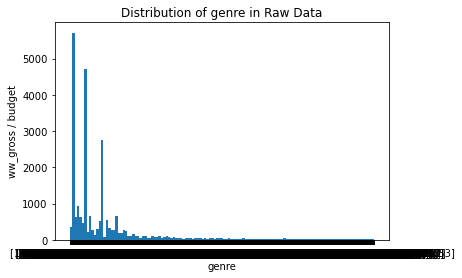

In [26]:
fig, ax = plt.subplots()
ax.hist(movie_db['genre_ids'], bins='auto')
ax.set_xlabel('genre')
ax.set_ylabel('ww_gross / budget')
ax.set_title('Distribution of genre in Raw Data')

## John

In [ ]:
hape of passed values is (31179, 15), indices imply (25497, 15)


In [ ]:
# Your code here - remember to use markdown cells for comments as well!